# Introduction

In [ ]:
"""
What? Comparison of manifold learning methods

Reference: https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py
"""

# Import modules

In [1]:
from collections import OrderedDict
from functools import partial
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
# Getting rid of the warning messages
import warnings
warnings.filterwarnings("ignore")
# Next line to silence pyflakes. This import is needed.
Axes3D

mpl_toolkits.mplot3d.axes3d.Axes3D

# Create dataset

In [2]:
n_points = 1000
X, color = datasets.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

# Plot original dataset

LLE: 0.13 sec
LTSA: 0.2 sec
Hessian LLE: 0.28 sec
Modified LLE: 0.23 sec
Isomap: 0.5 sec
MDS: 2.6 sec
SE: 0.12 sec
t-SNE: 4.7 sec


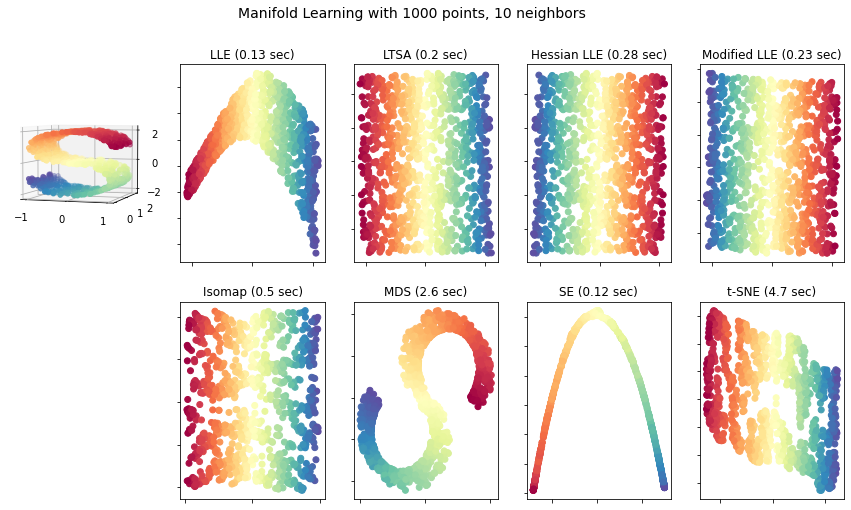

In [3]:

fig = plt.figure(figsize=(15, 8))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

# Add 3d scatter plot
ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

# Set-up manifold methods
LLE = partial(manifold.LocallyLinearEmbedding,
              n_neighbors, n_components, eigen_solver='auto')

methods = OrderedDict()
methods['LLE'] = LLE(method='standard')
methods['LTSA'] = LLE(method='ltsa')
methods['Hessian LLE'] = LLE(method='hessian')
methods['Modified LLE'] = LLE(method='modified')
methods['Isomap'] = manifold.Isomap(n_neighbors, n_components)
methods['MDS'] = manifold.MDS(n_components, max_iter=100, n_init=1)
methods['SE'] = manifold.SpectralEmbedding(n_components=n_components,
                                           n_neighbors=n_neighbors)
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca',
                                 random_state=0)

# Plot results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

plt.show()

In [4]:
"""
Note that the purpose of the MDS is to find a low-dimensional representation of the data (here 2D) in which the
distances respect well the distances in the original high-dimensional space, unlike other manifold-learning 
algorithms, it does not seeks an isotropic representation of the data in the low-dimensional space.
"""

'\nNote that the purpose of the MDS is to find a low-dimensional representation of the data (here 2D) in which the\ndistances respect well the distances in the original high-dimensional space, unlike other manifold-learning \nalgorithms, it does not seeks an isotropic representation of the data in the low-dimensional space.\n'